In [236]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential


In [237]:
df = pd.read_csv('Brain Tumor.csv')

In [238]:
print(df.head())

    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

In [239]:
df.tail()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155
3761,Image3762,0,6.110138,480.884025,21.929068,0.118171,4.110669,17.538826,239.251388,0.306224,0.093773,0.494333,6.787329,0.938731,7.458341e-155


In [240]:
df.dtypes


Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

In [241]:
#3762 images in the ds 
len(df)

3762

In [242]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [243]:
#drops image and class so it only contains input info
X = df.drop(['Image', 'Class'], axis=1)
#predicting the class aka y or n brain tumor as the y var 
y = df['Class']

In [244]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X)
print(scaler.inverse_transform(X_scaled))

           Mean     Variance  Standard Deviation   Entropy  Skewness  \
0      6.535339   619.587845           24.891522  0.109059  4.276477   
1      8.749969   805.957634           28.389393  0.266538  3.718116   
2      7.341095  1143.808219           33.820234  0.001467  5.061750   
3      5.958145   959.711985           30.979219  0.001477  5.677977   
4      7.315231   729.540579           27.010009  0.146761  4.283221   
...         ...          ...                 ...       ...       ...   
3757  21.234512  1208.850174           34.768523  0.063774  2.082079   
3758  20.435349  1227.151440           35.030721  0.066763  2.144625   
3759  18.011520  1151.582765           33.934978  0.068396  2.308349   
3760  13.330429   945.732779           30.752769  0.087872  2.732822   
3761   6.110138   480.884025           21.929068  0.118171  4.110669   

       Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0     18.900575   98.613971  0.293314  0.086033     0.53

In [245]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [246]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [247]:
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       419
           1       0.98      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[414   5]
 [  9 325]]


In [248]:
X_visualization = X_scaled[:, :2]


In [249]:
logistic_model_visualization = LogisticRegression(random_state=42)
logistic_model_visualization.fit(X_visualization, y)


LogisticRegression(random_state=42)

In [250]:
x_min, x_max = X_visualization[:, 0].min() - 1, X_visualization[:, 0].max() + 1
y_min, y_max = y[:].min(), y[:].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [251]:
Z = logistic_model_visualization.predict(np.c_[xx.ravel(), yy.ravel()])
Z_out = Z
Z = Z.reshape(xx.shape)

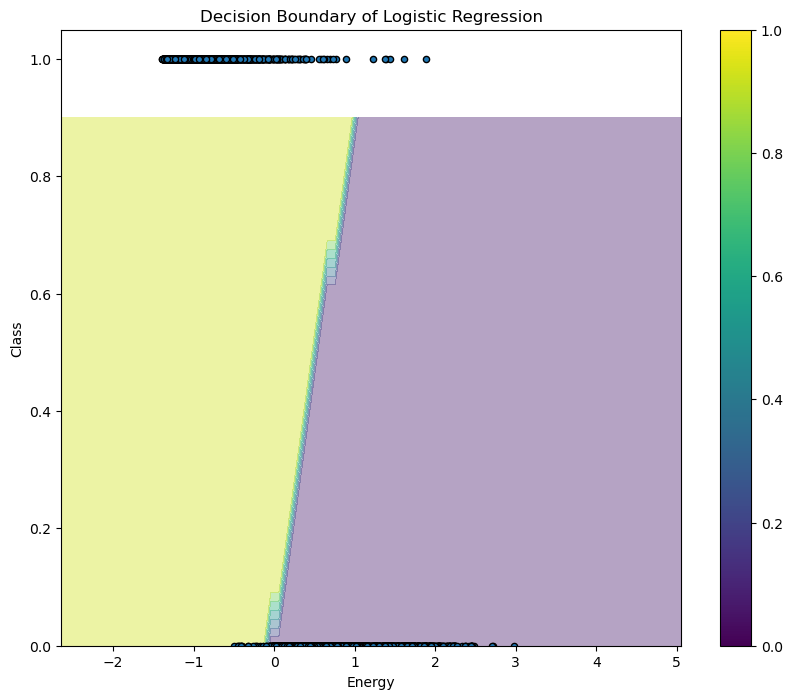

In [224]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[:, 7], y, s=20, edgecolor='k')
plt.xlabel(X.columns[7])
plt.ylabel('Class')
plt.title('Decision Boundary of Logistic Regression')
plt.colorbar()
plt.show()


In [255]:
test_image_index = 30 
test_data = X_test[test_image_index].reshape(1, -1)  # Reshape to 2D array
test_data_prediction = logistic_model.predict(test_data)
print("Prediction for image 31:", test_data_prediction)

Prediction for image 31: [0]


In [226]:
print("\nLogistic Regression Model Summary:")
print("Intercept:", logistic_model.intercept_)
print("Coefficients:", logistic_model.coef_)


Logistic Regression Model Summary:
Intercept: [0.76929755]
Coefficients: [[-6.05294284e-001  1.80587423e-001  1.12284963e+000 -9.86001490e-001
   3.71723549e+000 -2.16282511e-001  1.58051572e+000 -3.97996258e+000
  -3.15098596e-001 -3.38823302e+000 -2.14673548e+000  1.37612381e+000
   5.20791854e-167]]
